## Partie 1 : Arbre de décision

###  3. Prétraitement des données

####  3.a Graphes nécessaires pour la compréhension des données

In [16]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix,classification_report
from IPython.display import Image

In [4]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi',
'pedigree', 'age', 'label']
diabetes_data= pd.read_csv("diabetes.csv", header=None, names=col_names)

print(diabetes_data.dtypes)

pregnant    object
glucose     object
bp          object
skin        object
insulin     object
bmi         object
pedigree    object
age         object
label       object
dtype: object


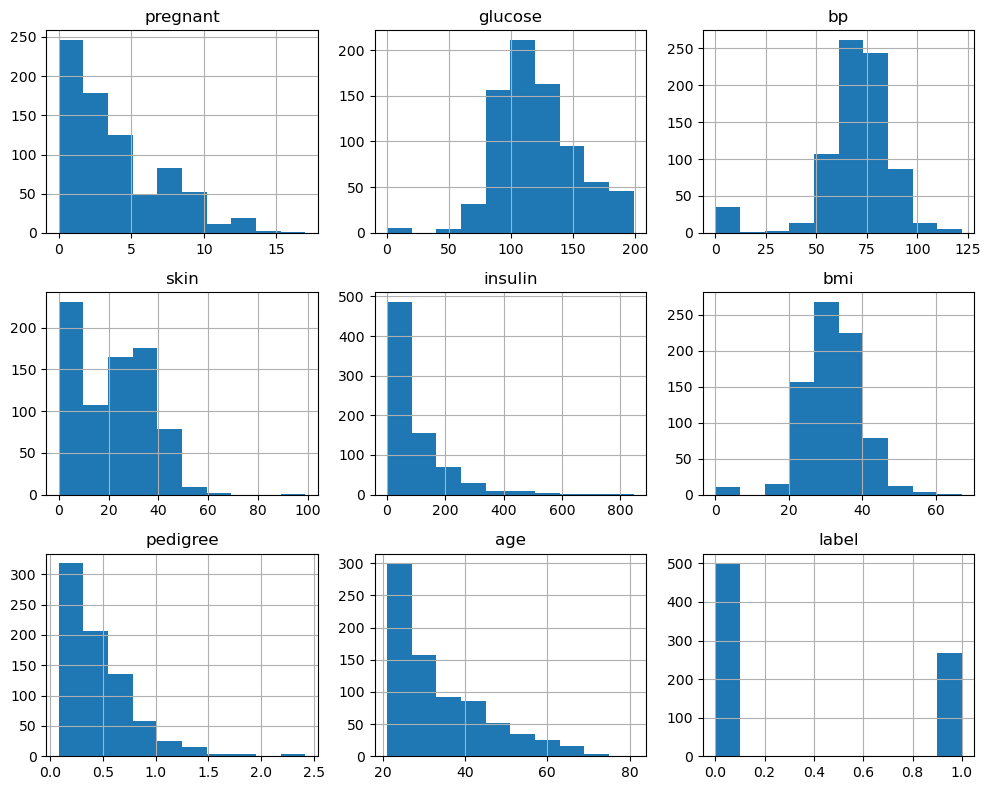

In [5]:
columns_to_convert = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
diabetes_data[columns_to_convert] = diabetes_data[columns_to_convert].apply(pd.to_numeric, errors='coerce')

# Histogrammes pour visualiser les distributions
diabetes_data.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

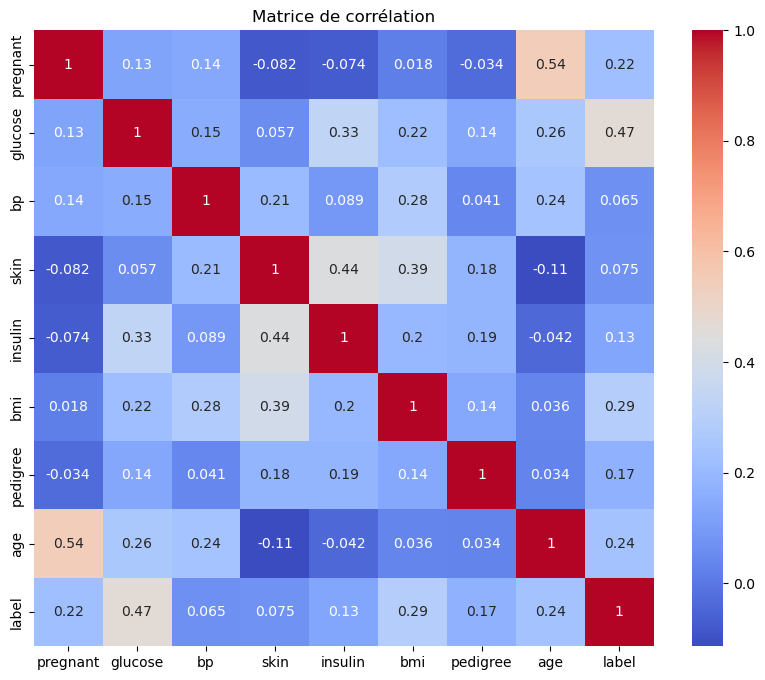

In [6]:
# Matrice de corrélation pour étudier les relations entre les variables
correlation_matrix = diabetes_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation')
plt.show()

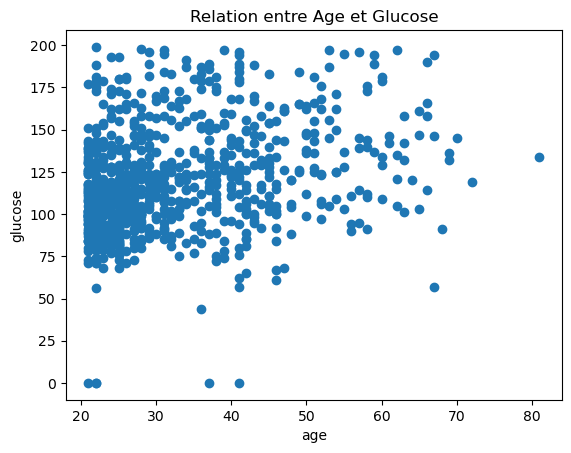

In [7]:
#Diagramme de dispersion (Scatter Plot) :
plt.scatter(diabetes_data['age'], diabetes_data['glucose'])
plt.xlabel('age')
plt.ylabel('glucose')
plt.title('Relation entre Age et Glucose')
plt.show()

####  3.c Divisez les colonnes en deux types de variables : cibles (Y) et caractéristiques (X).

In [8]:
# Séparation des caractéristiques et de la cible
X = diabetes_data.drop('label', axis=1)  # Caractéristiques
Y = diabetes_data['label']  # Cible

# Vérifier les caractéristiques (X)
print("Caractéristiques (X):")
print(X.head())  # Affiche les premières lignes de X
print()

# Vérifier la cible (Y)
print("Cible (Y):")
print(Y.head())  # Affiche les premières valeurs de Y
print()

# Comparaison avec le DataFrame original
print("Comparaison avec le DataFrame original:")
print("Colonnes dans diabetes_data:", diabetes_data.columns)
print("Colonnes dans X:", X.columns)
print("Colonne unique dans Y:", Y.unique())

Caractéristiques (X):
   pregnant  glucose    bp  skin  insulin   bmi  pedigree   age
0       NaN      NaN   NaN   NaN      NaN   NaN       NaN   NaN
1       6.0    148.0  72.0  35.0      0.0  33.6     0.627  50.0
2       1.0     85.0  66.0  29.0      0.0  26.6     0.351  31.0
3       8.0    183.0  64.0   0.0      0.0  23.3     0.672  32.0
4       1.0     89.0  66.0  23.0     94.0  28.1     0.167  21.0

Cible (Y):
0    NaN
1    1.0
2    0.0
3    1.0
4    0.0
Name: label, dtype: float64

Comparaison avec le DataFrame original:
Colonnes dans diabetes_data: Index(['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree',
       'age', 'label'],
      dtype='object')
Colonnes dans X: Index(['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree',
       'age'],
      dtype='object')
Colonne unique dans Y: [nan  1.  0.]


###  4. Construction du modèle

In [9]:
# Diviser les données en ensembles d'apprentissage et de test (par exemple, 80% pour l'entraînement et 20% pour le test)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print("X_train:")
print(X_train.head())  # Affiche les premières lignes de X_train

print("\nX_test:")
print(X_test.head())  # Affiche les premières lignes de X_test

print("\ny_train:")
print(y_train.head())  # Affiche les premières valeurs de y_train

print("\ny_test:")
print(y_test.head())  # Affiche les premières valeurs de y_test


X_train:
     pregnant  glucose    bp  skin  insulin   bmi  pedigree   age
60        0.0    105.0  64.0  41.0    142.0  41.5     0.173  22.0
618       2.0     68.0  62.0  13.0     15.0  20.1     0.257  23.0
346       8.0    126.0  88.0  36.0    108.0  38.5     0.349  49.0
294       1.0    128.0  48.0  45.0    194.0  40.5     0.613  24.0
231       4.0    142.0  86.0   0.0      0.0  44.0     0.645  22.0

X_test:
     pregnant  glucose    bp  skin  insulin   bmi  pedigree   age
669       6.0     98.0  58.0  33.0    190.0  34.0     0.430  43.0
324      13.0    152.0  90.0  33.0     29.0  26.8     0.731  43.0
625       2.0    108.0  64.0   0.0      0.0  30.8     0.158  21.0
691       8.0    107.0  80.0   0.0      0.0  24.6     0.856  34.0
473       0.0    119.0  66.0  27.0      0.0  38.8     0.259  22.0

y_train:
60     0.0
618    0.0
346    0.0
294    1.0
231    1.0
Name: label, dtype: float64

y_test:
669    0.0
324    1.0
625    0.0
691    0.0
473    0.0
Name: label, dtype: float64


In [10]:
# Drop rows with NaN or infinite values in the 'label' column
diabetes_data = diabetes_data[~diabetes_data['label'].isnull()]

# Convert 'label' column to integer
diabetes_data['label'] = diabetes_data['label'].round().astype(int)

# Separating features and target
X = diabetes_data.drop('label', axis=1)
Y = diabetes_data['label']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create Decision Tree classifier object
clf = DecisionTreeClassifier()

# Train the Decision Tree classifier
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

###  5. Evaluation du modèle

In [13]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy : {accuracy}")

Accuracy : 0.7532467532467533


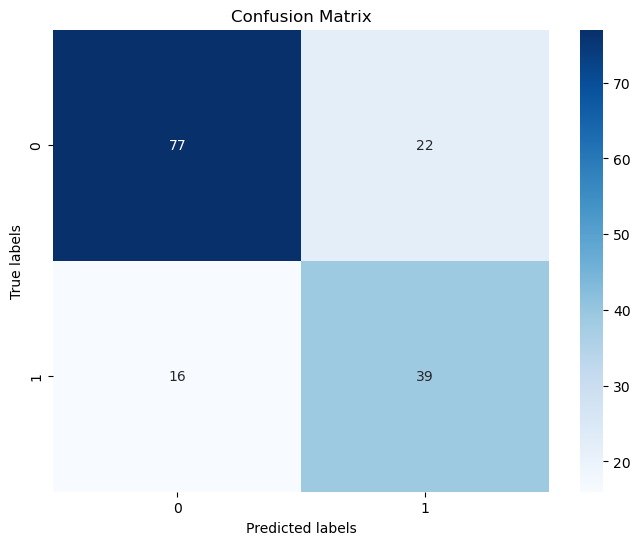

In [14]:
# Calcul de la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)

# Affichage de la matrice de confusion sous forme de heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

###  6. Visualisation des résultat

Confusion Matrix:
[[77 22]
 [16 39]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.78      0.80        99
           1       0.64      0.71      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.74       154
weighted avg       0.76      0.75      0.76       154



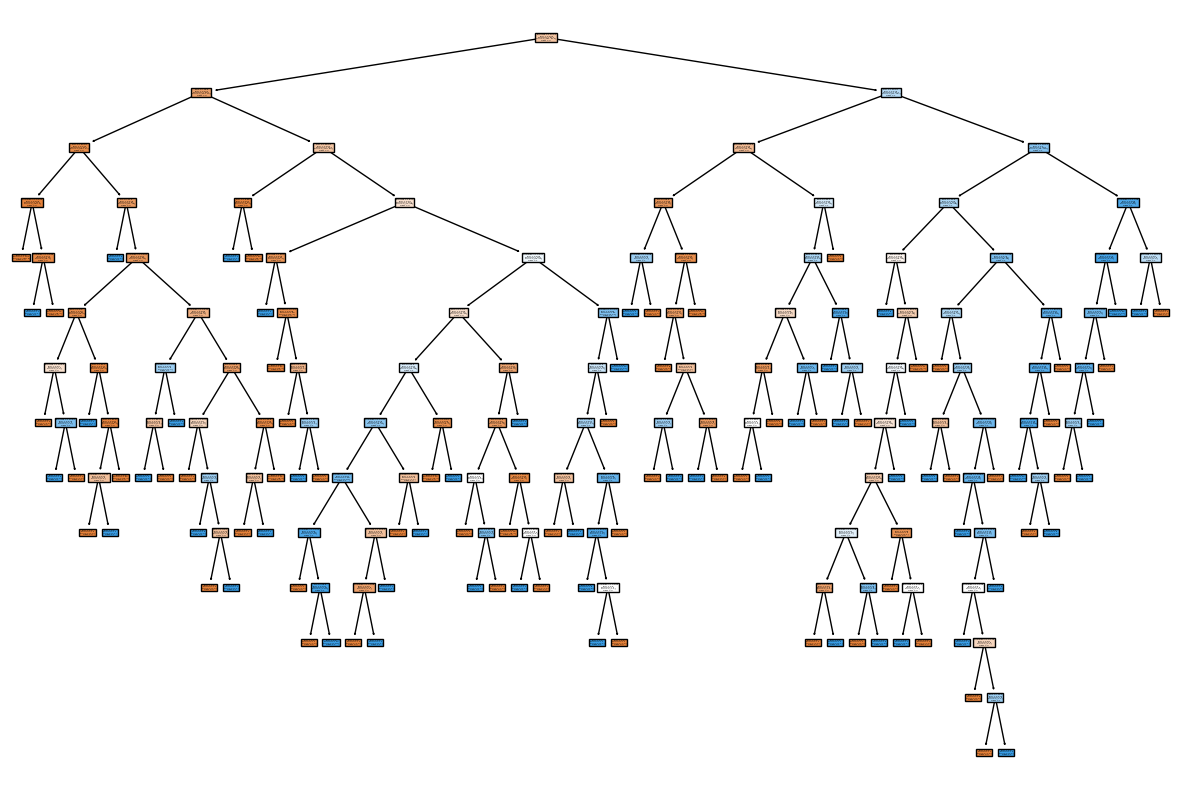

In [17]:
# Confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Visualize the Decision Tree
plt.figure(figsize=(15, 10))
plot_tree(clf, filled=True, feature_names=col_names[:-1], class_names=['0', '1'])
plt.show()

### 7. Optimisation des performances du modèle

####  7.a Appliquez l’entropie pour le calcul de l’impurité des nœuds et fixez la profondeur à 3.

In [18]:
# Créer un nouvel arbre de décision avec entropie comme critère et une profondeur maximale de 3
clf_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
# Entraîner le nouvel arbre de décision avec les nouvelles configurations
clf_entropy.fit(X_train, y_train)
# Faire des prédictions avec le nouvel arbre
y_pred_entropy = clf_entropy.predict(X_test)

####  7.b Génération d'un nouveau le graphique de l’arbre de décision.

Confusion Matrix:
[[83 16]
 [20 35]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.84      0.82        99
           1       0.69      0.64      0.66        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.76       154



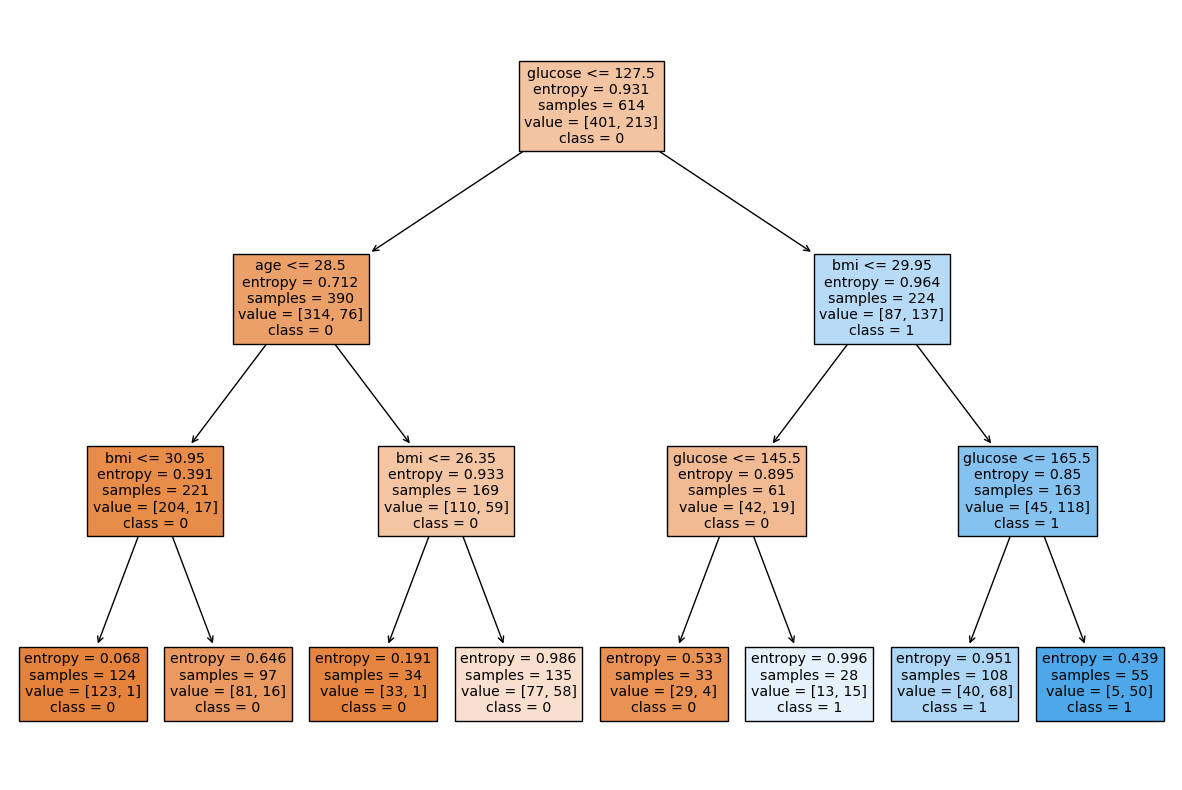

In [19]:
# Matrice de confusion et rapport de classification
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_entropy))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_entropy))

# Visualiser l'arbre de décision avec entropie
plt.figure(figsize=(15, 10))
plot_tree(clf_entropy, filled=True, feature_names=col_names[:-1], class_names=['0', '1'])
plt.show()

## Partie 2 : Les forêts aléatoires